# CS4320 - Introduction Machine Learning 

## Homework 1: Programming with Python  

**Please type your name and A number here:**

In [308]:
Name = "Rylei Mindrum"
assert Name != "", 'Please enter your name in the above quotation marks, thanks!'

A_number = "A02352206"
assert A_number != "", 'Please enter your A-number in the above quotation marks, thanks!'

Credit = "ChatGPT4 and ChatGPT3.5"

### About this assignment:
The main purpose of this assignment is to check whether your programming knowledge is adequate to take CS4320. This assignment covers two python packages, [`numpy`](https://numpy.org/) and [`pandas`](https://pandas.pydata.org/), which we'll be using throughout the course. For some of you, Python/numpy/pandas will be familiar; for others, it will be new. Either way, ***if you find this assignment very difficult then that could be a sign that you will struggle later on in the course***. While CS4320 is a machine learning course rather than a programming course, programming will be an essential part of it.

Imports
------

In [309]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Exercise 1: Loading files with Pandas
rubric={points:30}

When working with tabular data, you will typically be creating Pandas dataframes by reading data from .csv files using `pd.read_csv()`. The documentation for this function is available [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In the "data" folder in this homework repository there are 6 different .csv files named `wine_#.csv/.txt`. Look at each of these files and use `pd.read_csv()` to load these data so that all of the 6 different .csv/.txt are resemble the following:

| Bottle | Grape | Origin | Alcohol | pH | Colour | Aroma |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 1 |  Chardonnay | Australia | 14.23 | 3.51 | White | Floral |
| 2 |  Pinot Grigio | Italy | 13.20 | 3.30 | White | Fruity |
| 3 |  Pinot Blanc | France | 13.16 | 3.16 | White | Citrus |
| 4 |  Shiraz | Chile | 14.91 | 3.39 | Red | Berry |
| 5 |  Malbec | Argentina | 13.83 | 3.28 | Red | Fruity |

You are provided with tests that use `df.equals()` to check that all the dataframes are identical. If you're in a situation where the two dataframes look identical but `df.equals()` is returning `False`, it may be an issue of types - try checking `df.index`, `df.columns`, or `df.info()`.

In [310]:
import os
os.getcwd()

'C:\\Users\\ryryp\\Downloads'

In [311]:
# Insert your code here:
import pandas as pd

# Set the column names for standardization
column_names = ['Bottle', 'Grape', 'Origin', 'Alcohol', 'pH', 'Colour', 'Aroma']

# Use list comprehension to generate file paths
file_paths = [f"C:\\Users\\ryryp\\Downloads\\wine_{i}.csv" for i in range(1, 7)]

dataframes = []

for idx, file in enumerate(file_paths):
    if idx == 1:  # For File 2
        df = pd.read_csv(file, names=column_names, skiprows=2)
    elif idx == 2:  # For File 3
        df = pd.read_csv(file, names=column_names, skiprows=1, skipfooter=2, engine='python')
    elif idx == 4:  # For File 5
        temp_df = pd.read_csv(file, skiprows=1, header=None)
        temp_df.drop(columns=[0], inplace=True)  # Drop the first column
        temp_df = temp_df.shift(axis=1)  # Shift columns to the right
        temp_df.columns = column_names
        temp_df['Bottle'] = temp_df.index + 1  # Set "Bottle" column values as row numbers
        df = temp_df
    elif idx == 5:
        delimiter = '\t' if 'R\tO\tW' in open(file).readline() else ','
        df = pd.read_csv(file, skiprows=1, delimiter=delimiter)  # start reading from the second row
        df.drop(columns=['Unnamed: 8', 'C'], inplace=True)

    else:  # For File 1 and 4
        df = pd.read_csv(file, names=column_names, skiprows=1)
    dataframes.append(df)

df1, df2, df3, df4, df5, df6 = dataframes

df6 = df6[pd.to_numeric(df6['Bottle'], errors='coerce').notna()].copy()
df6['Bottle'] = df6['Bottle'].astype('int64')

def compare_dataframes_verbose(df1, df2):
    differences = {}
    
    for row in range(df1.shape[0]):
        if not df1.iloc[row].equals(df2.iloc[row]):
            differences[row] = {
                'df1': df1.iloc[row].to_dict(),
                'df2': df2.iloc[row].to_dict()
            }
    
            print(f"\nDifferences in row {row + 1}:")
            for col, value in differences[row]['df1'].items():
                if value != differences[row]['df2'][col]:
                    print(f"Column {col}:")
                    print(f"  df1: {value}")
                    print(f"  df6: {differences[row]['df2'][col]}")
                    
    return differences

differences = compare_dataframes_verbose(df1, df6)


print(df6.head())
print(df6.dtypes)

print(df1.head())
print(df1.dtypes)

print(df1.isna().sum())
print(df6.isna().sum())

print(df1.describe())
print(df6.describe())

   Bottle         Grape     Origin  Alcohol    pH Colour   Aroma
0       1    Chardonnay  Australia    14.23  3.51  White  Floral
1       2  Pinot Grigio      Italy    13.20  3.30  White  Fruity
2       3   Pinot Blanc     France    13.16  3.16  White  Citrus
3       4        Shiraz      Chile    14.91  3.39    Red   Berry
4       5        Malbec  Argentina    13.83  3.28    Red  Fruity
Bottle       int64
Grape       object
Origin      object
Alcohol    float64
pH         float64
Colour      object
Aroma       object
dtype: object
   Bottle         Grape     Origin  Alcohol    pH Colour   Aroma
0       1    Chardonnay  Australia    14.23  3.51  White  Floral
1       2  Pinot Grigio      Italy    13.20  3.30  White  Fruity
2       3   Pinot Blanc     France    13.16  3.16  White  Citrus
3       4        Shiraz      Chile    14.91  3.39    Red   Berry
4       5        Malbec  Argentina    13.83  3.28    Red  Fruity
Bottle       int64
Grape       object
Origin      object
Alcohol    float

In [312]:
for i, df in enumerate([df2, df3, df4, df5, df6]):
    assert df1.equals(df), f"df1 not equal to df{i + 2}"
print("All tests passed.")

All tests passed.


## Exercise 2: The Titanic dataset
Rubric={points:52}

The file *titanic.csv* contains data of 1309 passengers who were on the Titanic's unfortunate voyage. For each passenger, the following data are recorded:

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat - Lifeboat (if survived)
* body - Body number (if did not survive and body was recovered)

In this exercise you will perform a number of wrangling operations to manipulate and extract subsets of the data.

Note: many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary.

#### 2(a)
rubric={points:3}

Load the `titanic.csv` dataset into a pandas dataframe named `titanic_df`.

In [313]:
# Insert your code here:
import pandas as pd

# Load the Titanic dataset into a DataFrame
titanic_df = pd.read_csv('titanic.csv')

In [314]:
assert set(titanic_df.columns) == set(
    [
        "pclass",
        "survived",
        "name",
        "sex",
        "age",
        "sibsp",
        "parch",
        "ticket",
        "fare",
        "cabin",
        "embarked",
        "boat",
        "body",
        "home.dest",
    ]
), "All required columns are not present"
assert len(titanic_df.index) == 1309, "Wrong number of rows in dataframe"
print("Success")

Success


#### 2(b)
rubric={points:3}

The column names `sibsp` and `parch` are not very descriptive. Use `df.rename()` to rename these columns to `siblings_spouses` and `parents_children` respectively.

In [315]:
# Insert your code here:
titanic_df.rename(columns={"sibsp": "siblings_spouses", "parch": "parents_children"}, inplace=True)

In [316]:
assert set(["siblings_spouses", "parents_children"]).issubset(
    titanic_df.columns
), "Column names were not changed properly"
print("Success")

Success


#### 2(c)
rubric={points:3}

We will practice indexing different subsets of the dataframe in the following questions.

Select the column `age` using single bracket notation `[]`. Return the type of the object.

In [317]:
# Insert your code here:
# Select the "age" column using single bracket notation
age_column = titanic_df['age']

# Return the type of the object
column_type = type(age_column)
print(column_type)

<class 'pandas.core.series.Series'>


#### 2(d)
rubric={points:3}

Now select the `age` using double bracket notation `[[]]`.  Return the type of the object.

In [318]:
# Insert your code here:
age_column_df = titanic_df[['age']]

# Return the type of the object
column_type = type(age_column_df)
print(column_type)

<class 'pandas.core.frame.DataFrame'>


#### 2(e)
rubric={points:3}

Select the columns `pclass`, `survived`, and `age` using a single line of code.

In [319]:
# Insert your code here:
selected_columns = titanic_df[['pclass', 'survived', 'age']]

#### 2(f)
rubric={points:4}

Use the `iloc` method to obtain the first 5 rows of the columns `name`, `sex` and `age` using a single line of code.

In [320]:
# Insert your code here:
selected_rows = titanic_df.iloc[:5, titanic_df.columns.get_indexer(['name', 'sex', 'age'])]

#### 2(g)
rubric={points:4}

Now use the `loc` method to obtain the first 5 rows of the columns `name`, `sex` and `age` using a single line of code.

In [321]:
# Insert your code here:
selected_rows = titanic_df.loc[:4, ['name', 'sex', 'age']]

#### 2(h)
rubric={points:4}

How many passengers survived (`survived = 1`) the disaster? Hint: try using `df.query()` or `[]` notation to subset the dataframe and then `df.shape` to check its size.

In [322]:
# Insert your code here:
# Use [] notation to filter passengers who survived
survived_passengers = titanic_df[titanic_df['survived'] == 1]

# Check the number of survived passengers
num_survived = survived_passengers.shape[0]
print(f"Number of passengers who survived: {num_survived}")

Number of passengers who survived: 500


#### 2(i)
rubric={points:4}

How many passengers that survived the disaster (`survived = 1`) were over 60 years of age?

In [323]:
# Insert your code here:
# Use df.query() to filter passengers who survived and are over 60 years old
survived_over_60 = titanic_df.query('survived == 1 and age > 60')

# Check the number of survived passengers over 60 years old
num_survived_over_60 = survived_over_60.shape[0]
print(f"Number of passengers who survived and are over 60 years old: {num_survived_over_60}")

Number of passengers who survived and are over 60 years old: 8


#### 2(j)
rubric={points:4}

What was the lowest and highest fare paid to board the titanic? Store your answers as floats in the variables `lowest` and `highest`.

In [324]:
# Insert your code here:
# Find the lowest and highest fare
lowest = titanic_df['fare'].min()
highest = titanic_df['fare'].max()

# Print the results
print(f"Lowest fare paid: {lowest:.2f}")
print(f"Highest fare paid: {highest:.2f}")



Lowest fare paid: 0.00
Highest fare paid: 512.33


#### 2(k)
rubric={points:4}

Sort the dataframe by fare paid (most to least).

In [325]:
# Insert your code here:
# Sort the DataFrame by fare in descending order
titanic_df = titanic_df.sort_values(by='fare', ascending=False)

# Reset the index after sorting
titanic_df = titanic_df.reset_index(drop=True)

# Print the sorted DataFrame
print(titanic_df.head())


   pclass  survived                                               name  \
0       1         1                             Lesurer, Mr. Gustave J   
1       1         1                                   Ward, Miss. Anna   
2       1         1                 Cardeza, Mr. Thomas Drake Martinez   
3       1         1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
4       1         1                         Fortune, Miss. Mabel Helen   

      sex   age  siblings_spouses  parents_children    ticket      fare  \
0    male  35.0                 0                 0  PC 17755  512.3292   
1  female  35.0                 0                 0  PC 17755  512.3292   
2    male  36.0                 0                 1  PC 17755  512.3292   
3  female  58.0                 0                 1  PC 17755  512.3292   
4  female  23.0                 3                 2     19950  263.0000   

         cabin embarked boat  body  \
0         B101        C    3   NaN   
1          NaN        C    3

#### 2(l)
rubric={points:3}

Save the sorted dataframe to a .csv file called 'titanic_fares.csv' using `to_csv()`.

In [326]:
# Insert your code here
titanic_df.to_csv('titanic_fares.csv', index=False)


#### 2(m)
rubric={points:5}

Create a scatter plot of fare (y-axis) vs. age (x-axis). You are welcome to use pandas built-in plotting or `matplotlib`. 

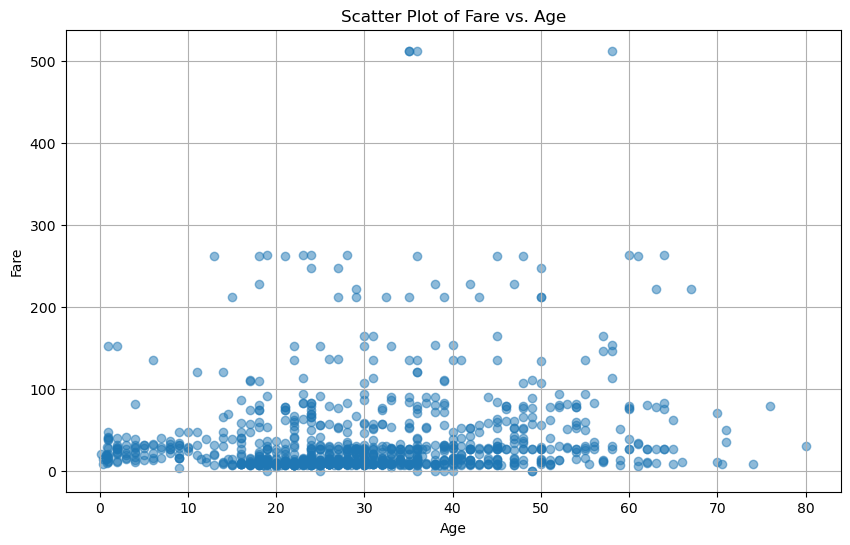

In [327]:
# Insert your code here

import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(titanic_df['age'], titanic_df['fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Fare vs. Age')
plt.grid(True)

# Show the plot
plt.show()



#### 2(n)
rubric={points:5}

Create a bar plot of `embarked` values. (You need to plot the frequency of 'embarked')

> Make sure to name the axes and give a title to your plot. 

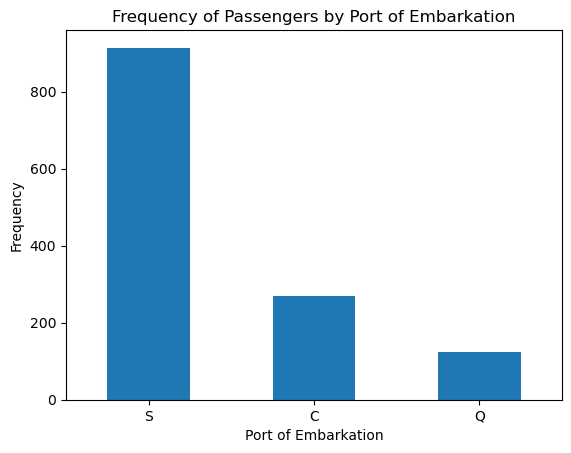

In [328]:
# Insert your code here:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already loaded the Titanic dataset into 'titanic_df'

# Count the frequency of each 'embarked' value
embarked_counts = titanic_df['embarked'].value_counts()

# Create a bar plot using pandas built-in plotting
embarked_counts.plot(kind='bar', rot=0)  # 'rot' controls the rotation of x-axis labels
plt.xlabel('Port of Embarkation')
plt.ylabel('Frequency')
plt.title('Frequency of Passengers by Port of Embarkation')

# Show the plot
plt.show()





<br><br>

## Exercise 3: Treasure Hunt
Rubric={points:18}

In this exercise, we will generate various collections of objects either as a list, a tuple, or a dictionary. Your task is to inspect the objects and look for treasure, which in our case is a particular object: **the character "T"**. 

**Your tasks:**

For each of the following cases, index into the Python object to obtain the "T" (for Treasure). 

> Please do not modify the original line of code that generates `x` (though you are welcome to copy it). You are welcome to answer this question "manually" or by writing code - whatever works for you. However, your submission should always end with a line of code that prints out `'T'` at the end (because you've found it). 

In [329]:
import string

letters = string.ascii_uppercase

The first one is done for you as an example.

#### Example question

In [330]:
x = ("nothing", {-i: l for i, l in enumerate(letters)})
x

('nothing',
 {0: 'A',
  -1: 'B',
  -2: 'C',
  -3: 'D',
  -4: 'E',
  -5: 'F',
  -6: 'G',
  -7: 'H',
  -8: 'I',
  -9: 'J',
  -10: 'K',
  -11: 'L',
  -12: 'M',
  -13: 'N',
  -14: 'O',
  -15: 'P',
  -16: 'Q',
  -17: 'R',
  -18: 'S',
  -19: 'T',
  -20: 'U',
  -21: 'V',
  -22: 'W',
  -23: 'X',
  -24: 'Y',
  -25: 'Z'})

**Example answer**:

In [331]:
x[1][-19]

'T'

> Note: In these questions, the goal is not to understand the code itself, which may be confusing. Instead, try to probe the types of the various objects. For example `type(x)` reveals that `x` is a tuple, and `len(x)` reveals that it has two elements. Element 0 just contains "nothing", but element 1 contains more stuff, hence `x[1]`. Then we can again probe `type(x[1])` and see that it's a dictionary. If you `print(x[1])` you'll see that the letter "T" corresponds to the key -19, hence `x[1][-19]`.

#### 3(a)
rubric={points:6}

Return the position(index) of 'T' when you find 'T'.

In [332]:
# Do not modify this cell
x = [
    [letters[i] for i in range(26) if i % 2 == 0],
    [letters[i] for i in range(26) if i % 2 == 1],
]

In [333]:
# Insert your code here:
# Find the position (index) of 'T'
for i, sublist in enumerate(x):
    if 'T' in sublist:
        index = sublist.index('T')
        print(f'T is found at index {index} in sublist {i}')


T is found at index 9 in sublist 1


#### 3(b)
rubric={points:6}

Return the position(index) of 'T' when you find 'T'.

In [334]:
# Do not modify this cell
np.random.seed(1)
x = np.random.choice(list(set(letters) - set("T")), size=(100, 26), replace=True)
x[np.random.randint(100), np.random.randint(26)] = "T"

In [335]:
# Insert your code here:
# Find the position (index) of 'T'
for row_idx, row in enumerate(x):
    for col_idx, element in enumerate(row):
        if element == 'T':
            print(f'T is found at row {row_idx}, column {col_idx}')
            break

T is found at row 95, column 2


#### 3(c)
rubric={points:6}

In [336]:
# Do not modify this cell
n = 26
x = dict()
for i in range(n):
    x[string.ascii_lowercase[i]] = {
        string.ascii_lowercase[(j + 1) % n]: [[letters[j]] if j - 2 == i else None]
        for j in range(n)
    }

In [337]:
# Insert your code here:
# Recursive function to find 'T' in a nested dictionary
def find_t(dictionary):
    for key, value in dictionary.items():
        if key == 'T':
            return 'T'
        elif isinstance(value, dict):
            result = find_t(value)
            if result == 'T':
                return f'{key} -> {result}'
    return None

# Find the position (index) of 'T'
result = find_t(x)
if result:
    print(f'T is found at path: {result}')


## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Please keep your notebook clean and remove any throwaway code.

![](eva-congrats.png)